## Review

In [3]:
import numpy as np
from numpy.random import default_rng
import math

np.set_printoptions(precision = 5 , suppress=True)

rng = default_rng(100)  

I = 1000  
S1 = rng.normal(loc=100.0, scale=20.0, size=I)  

P_raw = rng.random(I)  
P = P_raw / P_raw.sum()  

mu_S = float(np.dot(P, S1))
var_S = float(np.dot(P, (S1 - mu_S) ** 2))  
sigma_S = math.sqrt(var_S)  

print("E[S1]:", mu_S)
print("sd(S1):", sigma_S)

E[S1]: 100.7198164018502
sd(S1): 19.92233248318656


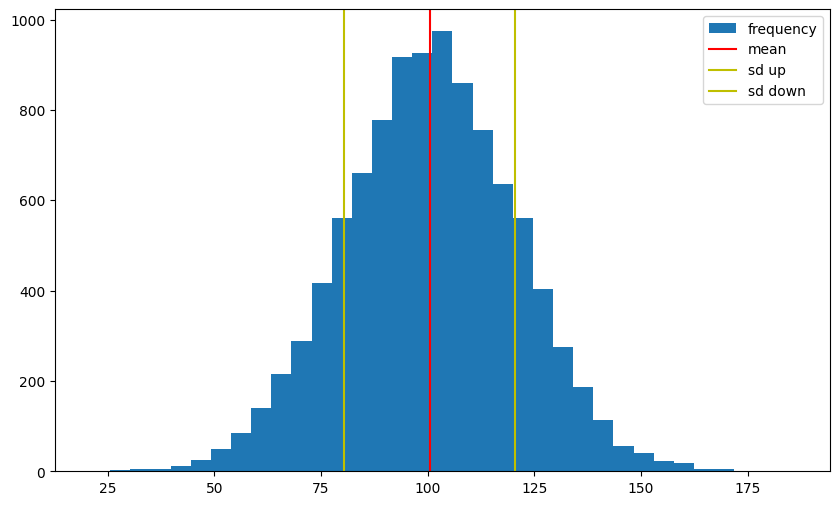

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.hist(ST, bins=35, label='frequency');
plt.axvline(ST.mean(), color ='r', label='mean')
plt.axvline(ST.mean()+ST.std(), color ='y', label='sd up')
plt.axvline(ST.mean()-ST.std(), color ='y', label='sd down')
plt.legend(loc=0)


In [ ]:
## given I , if rank(M) = I, it is complete

I_complete = 5
M_complete = np.eye(I_complete)

rank_complete = np.linalg.matrix_rank(M_complete)

## there is an exception with BSM. even I is much bigger than K, so rank(M) is much smaller than I. 
##But in narrow sense, the model is complete becasue every contingent claim that can be represented as a 
##function of the price vector of the stock C1 is replicable by positions in bond and the stock 

## exercise

In [9]:
import numpy as np
import math
from numpy.random import default_rng
import scipy.optimize as sco

M = np.array(
    (
        (11.0, 25.0, 0.0, 0.0, 25.0),
        (11.0, 20.0, 30.0, 15.0, 25.0),
        (11.0, 10.0, 0.0, 20.0, 10.0),
        (11.0, 5.0, 30.0, 15.0, 0.0),
        (11.0, 0.0, 0.0, 0.0, 0.0),
    )
)

M0 = np.ones(5) * 10

r = 0.1

def objective(Q):
    return float(np.sum((np.dot(M.T, Q) - M0 * (1.0 + r)) ** 2))

cons = ({"type": "eq", "fun": lambda Q: np.sum(Q) - 1.0},) 
bounds = [(0.0, 1.0)] * len(M)

Q0 = np.ones(len(M)) / len(M)

res = sco.minimize(objective, Q0, bounds = bounds, constraints = cons)

Q = res.x


print("objective:", objective(Q))
print("Q:", Q)
print("check:", np.allclose(np.dot(M.T, Q), M0 * (1.0 + r)))

objective: 2.3507393733980244e-09
Q: [0.14667 0.18333 0.275   0.18334 0.21166]
check: True


In [14]:
S0 = 100.0  # stock price today
r = 0.05  # risk-free rate
sigma = 0.20  # volatility
T = 1.0  # maturity
I = 20_000  # number of Monte Carlo states

K = 105.0  # strike price

rng = default_rng(100)  # seeded RNG

z = rng.standard_normal(I)
ST = S0 * np.exp((r - sigma **2/2) *T + sigma * z * math.sqrt(T))

CT = np.maximum (ST-K, 0)
C0 = math.exp(-r *T) * np.mean(CT)

## I don't understand here what is compare to a benchmark
## isn't the thing we calculate here a benchmark under GBM?

In [15]:
M0 = np.array((100,100))

S0 =100
r = 0.05  # risk-free rate
sigma = 0.20  # diffusion volatility

lmbda = 0.30  # jump intensity
mu = -0.30  # mean of jump log-size
delta= 0.10  # std of jump log-size
rj = lmbda *(math.exp(mu + delta **2/2) -1)

T = 1.0
I = 10000

BT_1 = M0[0] * np.ones(I) *math.exp(r*T)

z = rng.standard_normal((2,I))

z -= z.mean()
z /=z.std()
y = rng.poisson(lmbda,I)

ST_1 =np.maximum (S0 *(
    np.exp((r - rj - sigma **2/2)*T +
           sigma * math.sqrt(T) * z[0]) +
    (np.exp(mu + delta * z[1]) -1) * y
),0)

ST_1.mean() * math.exp(-r*T)

K = 105
CT_1= np.maximum(ST_1-K, 0)
C0_1 = math.exp(-r *T) * np.mean(CT_1)

M_1= np.array((BT_1, ST_1)).T





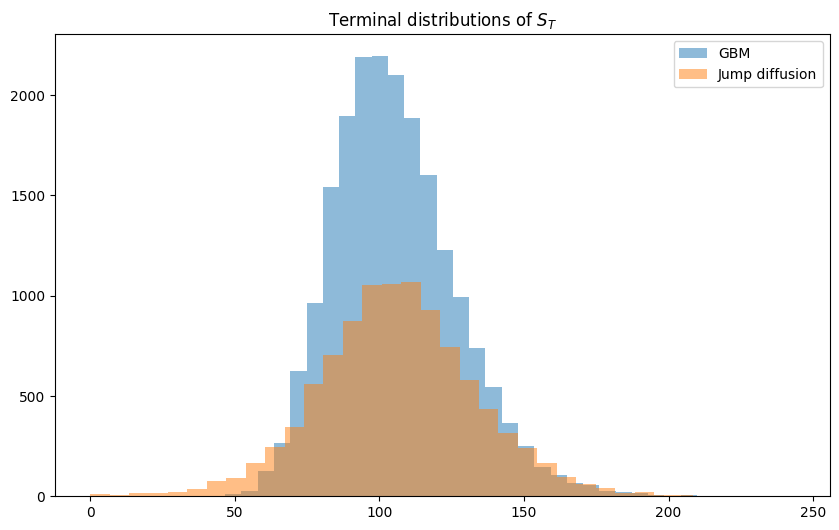

In [17]:
plt.figure(figsize=(10,6))
bins = 35
plt.hist(ST, bins=bins, alpha=0.5, label="GBM")
plt.hist(ST_1,  bins=bins, alpha=0.5, label="Jump diffusion")
plt.legend()
plt.title("Terminal distributions of $S_T$")
plt.show()

In [19]:
phi = np.linalg.lstsq(M_1, CT_1, rcond=None)[0]
CT_2 = np.dot(M_1 , phi)
err = CT_2 - CT_1
err

array([-18.09407,  -6.74831,   2.92244, ...,   7.23018,  -7.97979,
        -2.88455], shape=(10000,))

## Capstone

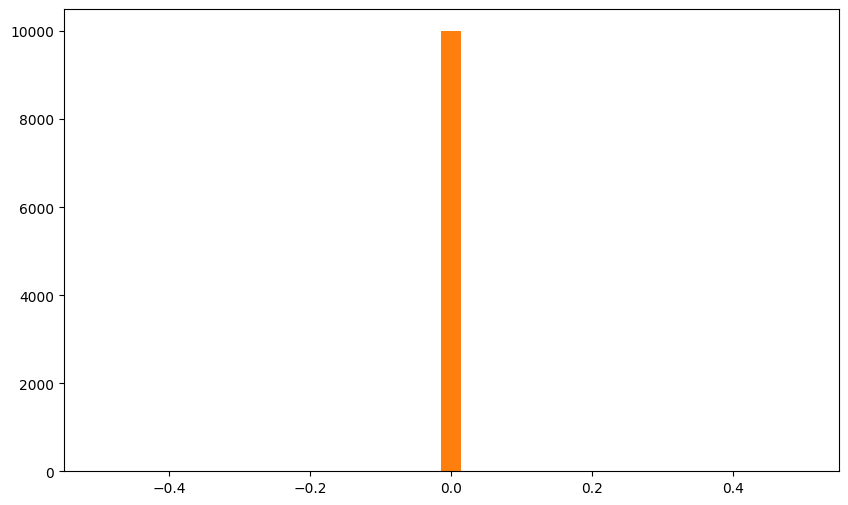

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import default_rng

I = 10000
S0 = 100
r = 0.05
sigma = 20
T= 1


rng= default_rng(100)
z = rng.standard_normal(I)
ST_gbm = S0 * np.exp((r - sigma**2/2) * T + sigma * math.sqrt(T) * z)

K=15
CT_gbm = np.maximum(ST_gbm - K, 0)
a = math.exp(-r*T) * CT_gbm
SE = a.std() / math.sqrt(I)

CI = (a.mean() - 1.96 * SE , a.mean() + 1.96 *SE)

plt.figure(figsize=(10,6))
plt.hist(ST_gbm, bins=35,label='GBM')
plt.hist(CT_gbm, bins=35,label='pay off')
plt.show()